In [11]:
from sklearn import datasets
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt

#Load Data
iris = datasets.load_iris()
x = iris.data
y = iris.target


Data preprocessing: For this task we will only use 2 features out of the possible 4, feature 1 and 3:

In [ ]:
zipped=np.column_stack((x, y))
zipped=list(map(lambda zipped: [zipped[0], zipped[2], zipped[-1]], zipped))
zipped=[entry for entry in zipped if entry[-1]!=0.0]
zipped=np.asarray(zipped)
data_set=zipped[:,[0,1]]
labels=zipped[:,[2]]

Plot data to see if it is linearly separable:

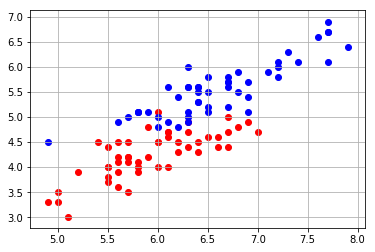

In [104]:
l = len([val for val in labels if val ==1])

a = data_set[:l]
a1 = a.T[0]
a2 = a.T[1]

b = data_set[l:]
b1 = b.T[0]
b2 = b.T[1]

plt.scatter(a1, a2, color="red")
plt.scatter(b1, b2, color="blue")
plt.grid()
plt.show()
# Plot the data set 

In [105]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

print(np.subtract([2,3,5], 4.0))

[-2. -1.  1.]


Use SVM to find the best coefficients for the line to separate data

In [131]:
import math

d=dict()
print('  C \t | training error     |     number of support vectors')
for i in range(-3,6,1):
    
    C=math.pow(10,i)
    clf = SVC(C,kernel='linear')
    clf.fit(data_set,labels.ravel())
    error=1-clf.score(data_set, labels.ravel())
    d[C]=(round(error,4),len(clf.support_vectors_))
    print('{}  \t, \t{}\t\t, \t{}'.format(C, d[C][0], d[C][1]))


minimum_C=min(d, key=d.get)
print("The Value of C with the minimum test error and minimum number of support vectors is:", minimum_C)
clf = SVC(minimum_C,kernel='linear')
clf.fit(data_set,labels.ravel())


w=clf.coef_[0]
intercept=clf.intercept_[0]

  C 	 | training error     |     number of support vectors
0.001  	, 	0.17		, 	100
0.01  	, 	0.16		, 	92
0.1  	, 	0.07		, 	56
1.0  	, 	0.07		, 	31
10.0  	, 	0.05		, 	18
100.0  	, 	0.05		, 	14
1000.0  	, 	0.05		, 	14
10000.0  	, 	0.05		, 	14
100000.0  	, 	0.06		, 	14
The Value of C with the minimum test error and minimum number of support vectors is: 100.0


Plot the line that the algorithm found on the original dataset:

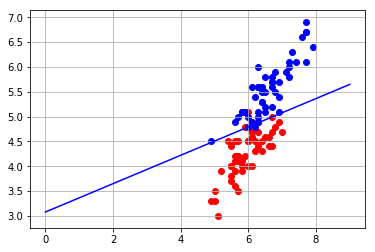

In [7]:
import matplotlib.pyplot as plt
l = len([val for val in labels if val ==1])

a = data_set[:l]
a1 = a.T[0]
a2 = a.T[1]

b = data_set[l:]
b1 = b.T[0]
b2 = b.T[1]

xdata = np.array(range(0, 10))
ydata=(-w[0]/w[1])*xdata-intercept/w[1]
plt.plot(xdata, ydata, color="blue")

plt.scatter(a1, a2, color="red")
plt.scatter(b1, b2, color="blue")
plt.grid()
plt.show()

